# Blinkit Data Analysis in Python

### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw data**

In [15]:
df = pd.read_csv("BlinkIT Grocery Data.csv")

In [16]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### **Size of Data**

In [17]:
df.shape

(8523, 12)

### **Field Info**

In [18]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

### **Data Types**

In [19]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

In [20]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF':'Low Fat',
    'low fat':'Low Fat',
    'reg':'Regular'
})

In [22]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [24]:
df = df.rename(columns={'Total Sales': 'Sales'})

### **Business Requirements**

### **KPI's Requirements**

In [26]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#No of Items Sold
no_of_items_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()

#Display
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.1f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:.1f}")

Total Sales: $1,201,681
Average Sales: $141.0
No of Items Sold: 8,523
Average Ratings: 4.0


### **Charts Requirements**

### **Total Sales by Fat Content**

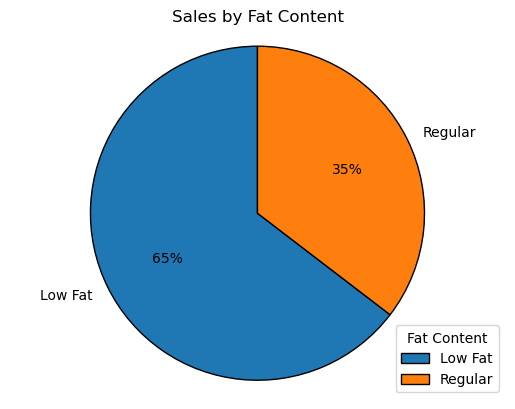

In [38]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index,
        autopct='%.0f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})  # Add black border

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.legend(title='Fat Content', loc='best')  # Add legend
plt.show()

### **Total Sales by Item Type**

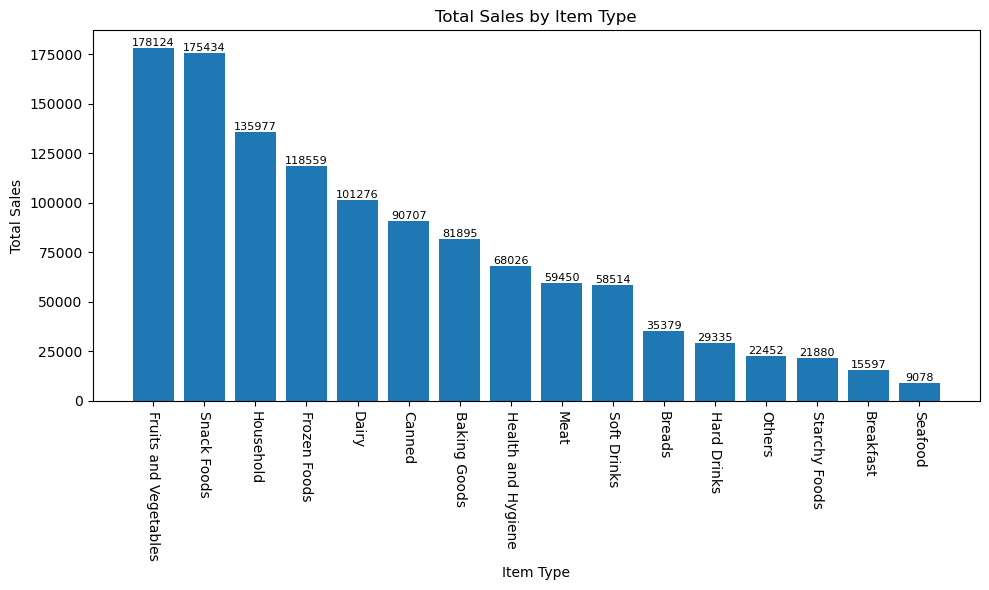

In [29]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### **Fat Content by Outlet for Total Sales**

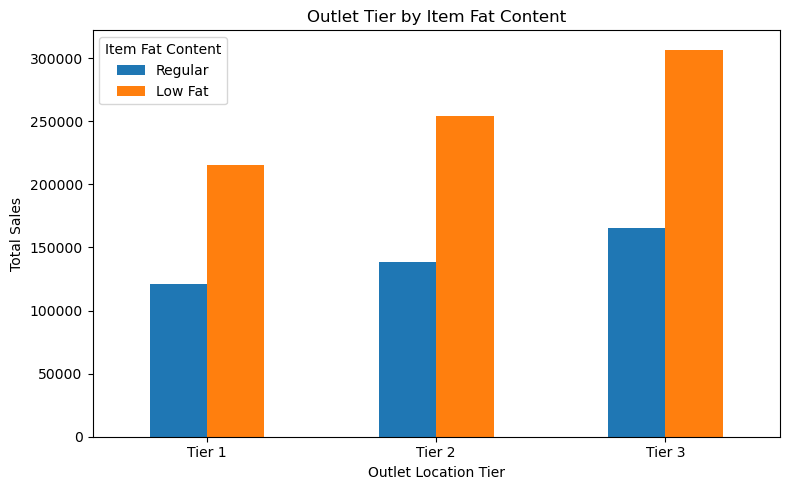

In [31]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

### **Total Sales by Outlet Establishment**

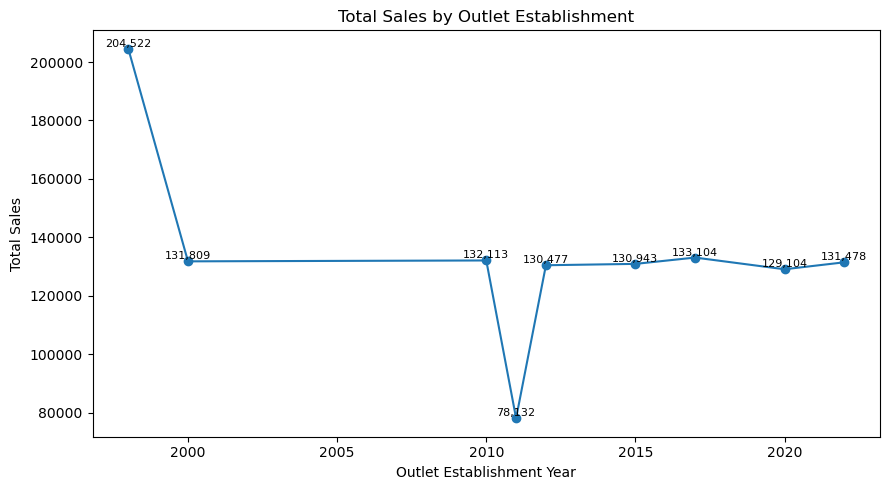

In [70]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### **Sales by Outlet Size**

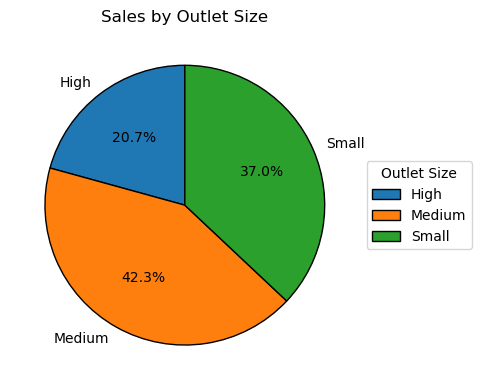

In [46]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(6, 4))  # Slightly wider to accommodate legend
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title('Sales by Outlet Size')
plt.legend(title='Outlet Size', loc='center left', bbox_to_anchor=(1, 0.5))  # Legend on right side
plt.tight_layout()
plt.show()

### **Total Sales by Outlet Location Type**

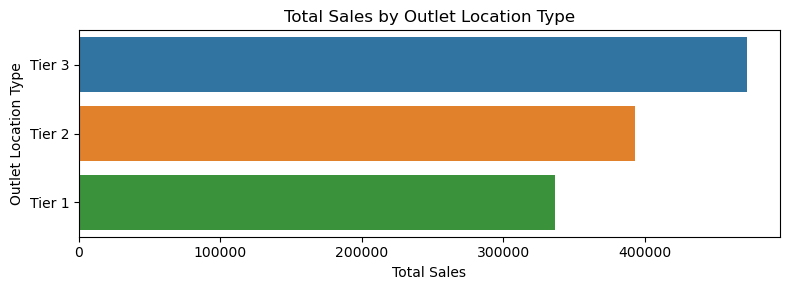

In [37]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))  # Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()  # Ensures Layout fits without scroll
plt.show()

In [ ]:
##Sales Distribution Across Outlet Type & Item Type
#Goal: Find which Outlet Type performs best for each Item Type.
#Insight: You’ll see which product categories perform better in which outlet types.

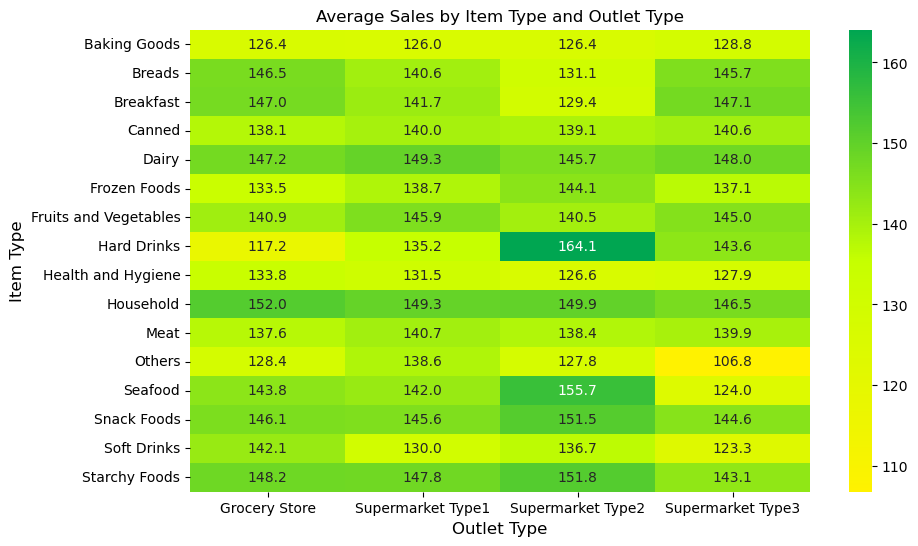

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Custom Blinkit-style colormap (yellow → lime → green)
blinkit_cmap = LinearSegmentedColormap.from_list("blinkit", ["#fff200", "#c6ff00", "#00a651"])

pivot = df.pivot_table(values='Sales', index='Item Type', columns='Outlet Type', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap=blinkit_cmap)
plt.title("Average Sales by Item Type and Outlet Type")
plt.xlabel("Outlet Type", fontsize=12)
plt.ylabel("Item Type", fontsize=12)
plt.show()
